# Ćwiczenie 11
Wykrywanie krawędzi obiektów i poprawa ostrości.

1. Użyj filtra z maską Sobela do wykrywania krawędzi poziomych, pionowych i ukośnych.
2. Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.
3. Zbadaj działanie filtrów typu „unsharp masking” i „high boost”.

In [35]:
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np
import cv2 as cv 
from skimage.filters import sobel,laplace,unsharp_mask,gaussian

In [36]:
# Załadowanie pliku .tiff
img_a = tiff.imread("src/circuitmask.tif") 
img_b = cv.imread("src/testpat1.png") 
img_c = tiff.imread("src/blurry-moon.tif") 
img_d = tiff.imread("src/text-dipxe-blurred.tif") 

### Zadanie 1
Użycie maski Sobela

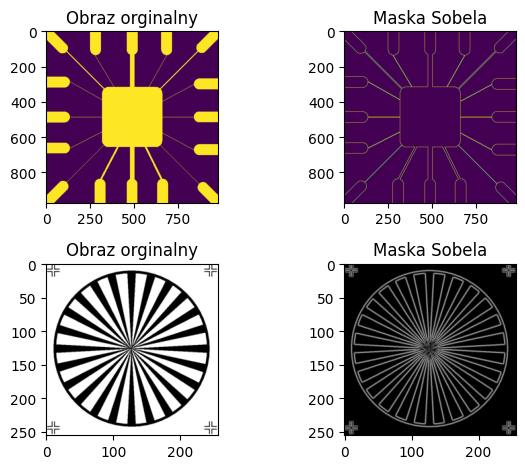

In [37]:

plt.subplot(2,2,1)
plt.imshow(img_a)
plt.title("Obraz orginalny")

plt.subplot(2,2,2)
sob_img_a = sobel(img_a)
plt.imshow(sob_img_a)
plt.title("Maska Sobela")

plt.subplot(2,2,3)
plt.imshow(img_b)
plt.title("Obraz orginalny")

plt.subplot(2,2,4)
sob_img_b = sobel(img_b)
plt.imshow(sob_img_b)
plt.title("Maska Sobela")
plt.tight_layout()
plt.show()

### Zadanie 2
Wykorzystanie Laplasjanu

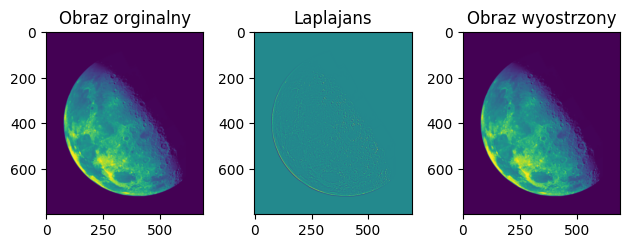

In [ ]:
plt.subplot(1,3,1)
plt.imshow(img_c)
plt.title("Obraz orginalny")

plt.subplot(1,3,2)
lap_img_c = laplace(img_c)
plt.imshow(lap_img_c)
plt.title("Laplasjan")

plt.subplot(1,3,3)
fin_img_c = img_c - lap_img_c
plt.imshow(fin_img_c)
plt.title("Obraz wyostrzony")

plt.tight_layout()
plt.show()

### Zadanie 11
Wykorzystanie filtrów "unsharp masking" oraz "high boost"

In [1]:
def highBoostFilter(img, k=1.5, sigma = 3):
    blur = gaussian(img,sigma=sigma)
    mask = k * img-blur
    return mask 

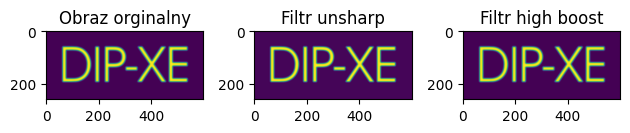

In [48]:
plt.subplot(1,3,1)
plt.imshow(img_d)
plt.title("Obraz orginalny")

plt.subplot(1,3,2)
us_img_d = unsharp_mask(img_d)
plt.imshow(us_img_d)
plt.title("Filtr unsharp")

plt.subplot(1,3,3)
hb_img_d = highBoostFilter(img_d) 
plt.imshow(hb_img_d)
plt.title("Filtr high boost")

plt.tight_layout()
plt.show()
